In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("mushrooms.csv", sep=",")

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


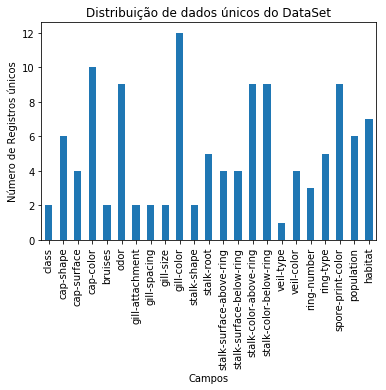

In [10]:
num_unique_labels = df.apply(pd.Series.nunique)

# plotando valores
num_unique_labels.plot( kind='bar')

# Nomeando os eixos
plt.xlabel('Campos')
plt.ylabel('Número de Registros únicos')
plt.title('Distribuição de dados únicos do DataSet')

# Exibindo gráfico
plt.show()

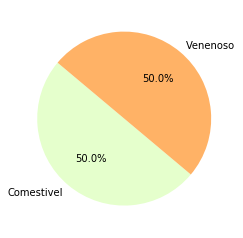

In [23]:
pie = pd.DataFrame([['Comestivel',pd.value_counts(df['class']) [0]],['Venenoso',pd.value_counts(df['class']) [0]]],
                   columns=['Tipo' , 'Quantidade'])

plt.pie(pie["Quantidade"], # define a quantidade de cada feature
        labels={'Comestivel':0,'Venenoso':1}, # define os labels das features
        colors=['#e5ffcc', '#ffb266'], # define as cores
        autopct='%1.1f%%', # permite a exibição da porcentagem de frequencia
        startangle=140) # rotaciona a imagem ao angulo x

In [0]:
# X =  colunas de informação, variáveis independentes
X = df.drop('class', axis=1)
# y = Variável dependente, a qual será utilizada para classificar os dados
y = df['class']

In [0]:
#Importando o encoder para transformar as labels em chaves numéricas
from sklearn.preprocessing import OneHotEncoder
Oht_enc = OneHotEncoder()
X = pd.DataFrame(Oht_enc.fit_transform(X).A)

In [0]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [0]:
#Importing librarie
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
X_test[0]

array([-0.24460631, -0.02297586, -0.7923554 , -0.33864937, -0.0623232 ,
        1.10424629, -0.6301203 , -0.02653257,  1.4699132 , -0.81428458,
       -0.14494536, -0.07282926, -0.47173381, -0.54442413, -0.62522012,
       -0.13447734, -0.04402642, -0.04197385, -0.38439483,  2.56147813,
       -1.18371552,  1.18371552,  4.30575416, -0.14992655, -0.59996811,
       -0.23308729, -0.06088491, -0.88014583, -0.18080821, -0.27323081,
       -0.27285894, -0.16961093,  0.16961093,  0.4444737 , -0.4444737 ,
        0.66239353, -0.66239353, -0.51474369, -0.11001796,  3.14195686,
       -0.31726669, -0.23434272, -0.38650157, -0.09226948, -0.47729715,
       -0.04968164, -0.2529763 , -0.41021476, -0.11244866,  1.14392604,
       -1.14392604, -0.65909763, -0.92212209,  3.64014101, -0.40699098,
       -0.16119367, -0.27323081, -0.63529839,  0.75001145, -0.05476098,
       -0.28746337, -0.6233158 ,  0.80268491, -0.19241499, -0.23559285,
       -0.06088491, -0.10836869, -0.27508469, -0.24135914, -0.16

In [42]:
y_test

549     e
786     e
8060    p
7142    p
5865    e
4055    p
4497    e
1709    e
2574    e
6543    p
7091    p
6442    p
6772    p
4379    e
6255    p
7699    e
6785    p
3033    e
937     e
4146    p
718     e
6709    p
5393    p
2612    e
6029    p
2676    e
1855    e
2608    e
4003    e
5061    p
       ..
6427    p
2128    p
1501    e
182     e
2407    e
2812    e
7340    p
5352    p
6082    p
4596    p
7614    p
3128    e
7006    p
3980    p
7038    p
3477    p
8091    p
5473    p
3769    e
6057    p
5477    p
6997    e
4746    p
3510    e
4950    p
7445    e
156     e
1045    e
7674    e
1523    e
Name: class, Length: 2438, dtype: object

In [39]:
classifier.predict([X_test[0]])

array(['e'], dtype=object)

In [0]:
y_pred = classifier.predict(X_test) 

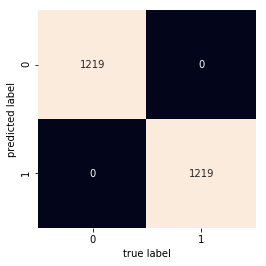

In [34]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

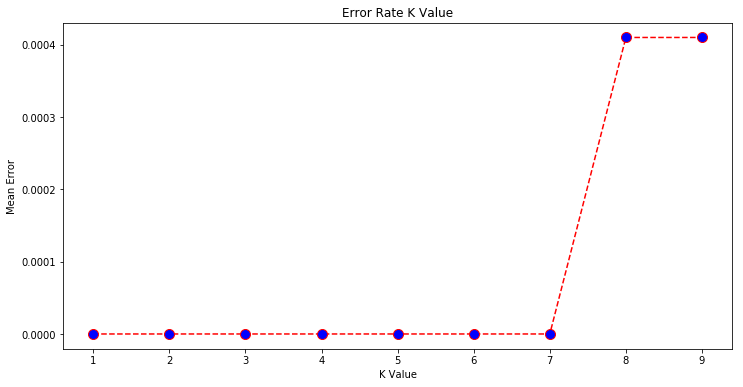

In [36]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  